Explore the bash history of this computer
========

Load the bash history on this computer

In [14]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def counts_of(corpus, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    matrix = vectorizer.fit_transform(corpus)
    counts = matrix.toarray().sum(axis=0)
    words = vectorizer.get_feature_names()
    counts = zip(words, counts)
    return counts

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    unigram_count = counts_of(corpus, (1,1))
    bigram_count = counts_of(corpus, (2,2))

In [15]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI unigrams")
    plt.show()
    

The most popular unigrams are:

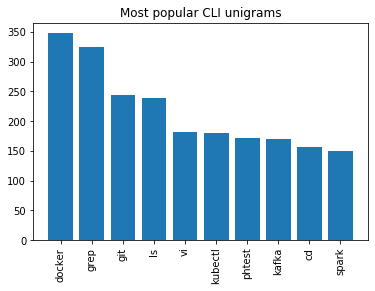

In [16]:
plot_histogram_of(unigram_count)

The most popular bigrams are:

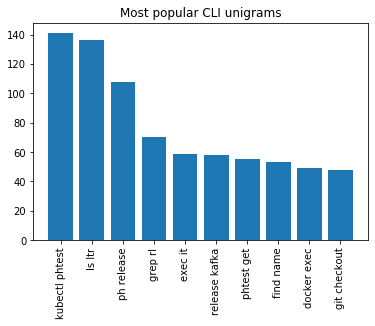

In [17]:
plot_histogram_of(bigram_count)